<a href="https://colab.research.google.com/github/MiguelMendozaG/Redes_Neuronales/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
from keras.datasets import cifar10
import time

Using TensorFlow backend.


In [2]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [3]:
x_train.shape
x_train[0].shape
print(type(x_train[0][0][0][0]))

<class 'numpy.uint8'>


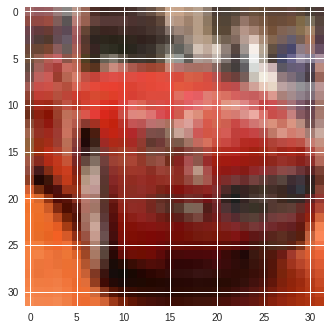

In [4]:
plt.imshow(x_train[5])

In [5]:
print((y_train_.shape))
print(y_train_[:,0])

(50000, 1)
[6 9 9 ... 9 1 1]


In [0]:
y_train_one_hot_encoding = np.zeros((len(y_train_),10))
y_train_one_hot_encoding[np.arange(len(y_train_)), y_train_[:,0]] = 1

In [7]:
print(y_train_one_hot_encoding[2])
print(y_train_[2])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9]


In [0]:
y_test_one_hot_encoding = np.zeros((len(y_test_),10))
y_test_one_hot_encoding[np.arange(len(y_test_)), y_test_[:,0]] = 1

In [9]:
print(y_test_[60])
print(y_test_one_hot_encoding[60])

[7]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
def AlexNet(keep_rate = 0.8, n_classes=10, batch_size = 100):
    #limpiar graficas anteriores
    #reset_graph()

    
    #Imagenes 
    img = x
    #tf.summary.image("Image", img)
    
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.random_normal([11,11,3,48])),
               'W_conv2':tf.Variable(tf.random_normal([5,5,48,128])),
               'W_conv3':tf.Variable(tf.random_normal([3,3,128,192])),
               'W_conv4':tf.Variable(tf.random_normal([3,3,192,192])),
               'W_conv5':tf.Variable(tf.random_normal([3,3,192,128])),
               'W_fc1':tf.Variable(tf.random_normal([6*6*128,1024])),
               'W_fc2':tf.Variable(tf.random_normal([1024,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([48])),
              'b_conv2':tf.Variable(tf.random_normal([128])),
              'b_conv3':tf.Variable(tf.random_normal([192])),
              'b_conv4':tf.Variable(tf.random_normal([192])),
              'b_conv5':tf.Variable(tf.random_normal([128])),
              'b_fc1':tf.Variable(tf.random_normal([1024])),
              'b_fc2':tf.Variable(tf.random_normal([1024])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x48
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,4,4,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    
    #Input: 50x50x48     Output: 50x50x128
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    
    #Input: 50x50x128     Output: 25x25x128
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #Input: 25x25x128     Output: 13x13x192
    l3 = tf.nn.conv2d(l2, weights['W_conv3'], strides=[1,2,2,1], padding='SAME')
    l3 = tf.add(l3, biases['b_conv3'])
    l3 = tf.nn.relu(l3)
    #l3 = tf.nn.dropout(l3, min(keep_rate+0.1,1))
    
    #Input: 13x13x192     Output: 13x13x192
    l4 = tf.nn.conv2d(l3, weights['W_conv4'], strides=[1,1,1,1], padding='SAME')
    l4 = tf.add(l4, biases['b_conv4'])
    l4 = tf.nn.relu(l4)
    
    #Input: 13x13x192    Output: 13x13x128
    l5 = tf.nn.conv2d(l4, weights['W_conv5'], strides=[1,1,1,1], padding='SAME')
    l5 = tf.add(l5, biases['b_conv5'])
    l5 = tf.nn.relu(l5)
    
    #Input: 13x13x128    Output: 6x6x128
    l5 = tf.nn.max_pool(l5, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    #print("Layer 5: ",l5.shape)
    #l5 = tf.nn.dropout(l5, keep_rate)
    
    
    #Input: 6x6x128     Output: 4608
    fc1 = tf.reshape(l5, [-1, 6*6*128])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    fc1 = tf.nn.dropout(fc1, keep_rate)
                          
    #Input: 4608     Output: 1024
    fc2 = tf.nn.relu(tf.matmul(fc1, weights['W_fc2'])+biases['b_fc2'])
    fc2 = tf.nn.dropout(fc2, keep_rate2)

    output_ = tf.matmul(fc2, weights['out'])+biases['out']
    
    return output_

In [0]:
def minired(x,keep_rate = 0.8, n_classes=10, batch_size = 100):
    #limpiar graficas anteriores
    #reset_graph()

    
    #Imagenes 
    #img = tf.reshape(x, shape = [-1, 32, 32,3])
    img = x
    #tf.summary.image("Image", img)
    
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.random_normal([3,3,3,32])),
               'W_conv2':tf.Variable(tf.random_normal([3,3,32,64])),
               'W_fc1':tf.Variable(tf.random_normal([6*6*64,2304])),
               'out':tf.Variable(tf.random_normal([2304, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
              'b_conv2':tf.Variable(tf.random_normal([64])),
              'b_fc1':tf.Variable(tf.random_normal([2304])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x48
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,1,1,1], padding='VALID')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    print("Conv_1",l1)
    l1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    print("Max_pool_1", l1)
    
    #Input: 50x50x48     Output: 50x50x128
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='VALID')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    print("Conv_2",l2)
    
    #Input: 50x50x128     Output: 25x25x128
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    print("Max_pool_2", l2)
    

    #Input: 6x6x128     Output: 4608
    fc1 = tf.reshape(l2, [-1, 6*6*64])
    fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    print("FC ", fc1)
    fc1 = tf.nn.dropout(fc1, keep_rate)


    output_ = tf.matmul(fc1, weights['out'])+biases['out']
    print("output ", output_)
    
    return output_

In [0]:
def minired_tn(x,keep_rate = 0.8, n_classes=10, batch_size = 100):
    #limpiar graficas anteriores
    #reset_graph()

    mu = 0
    sigma = 0.1
    #Imagenes 
    #img = tf.reshape(x, shape = [-1, 32, 32,3])
    img = x
    #tf.summary.image("Image", img)
    
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,3,48], mean = mu, stddev = sigma)),
               'W_conv2':tf.Variable(tf.truncated_normal([3,3,48,80], mean = mu, stddev = sigma)),
               'W_fc1':tf.Variable(tf.truncated_normal([6*6*80,2304], mean = mu, stddev = sigma)),
               'out':tf.Variable(tf.truncated_normal([6*6*80, n_classes], mean = mu, stddev = sigma))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([48])),
              'b_conv2':tf.Variable(tf.random_normal([80])),
              'b_fc1':tf.Variable(tf.random_normal([6*6*80])),
              'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    #Input: 200x200x3     Output: 50x50x48
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,1,1,1], padding='VALID')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    print("Conv_1",l1)
    l1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    print("Max_pool_1", l1)
    
    #Input: 50x50x48     Output: 50x50x128
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='VALID')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    print("Conv_2",l2)
    
    #Input: 50x50x128     Output: 25x25x128
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    print("Max_pool_2", l2)
    

    #Input: 6x6x128     Output: 4608
    fc1 = tf.reshape(l2, [-1, 6*6*80])
    #fc1 = tf.nn.relu(tf.matmul(fc1, weights['W_fc1'])+biases['b_fc1'])
    #print("FC ", fc1)
    #fc1 = tf.nn.dropout(fc1, keep_rate)


    output_ = tf.matmul(fc1, weights['out'])+biases['out']
    print("output ", output_)
    
    return output_

In [26]:
# Declarando las entradas y salidas
x=tf.placeholder('float',[None,32,32,3])
y=tf.placeholder('float')
keep_rate = tf.placeholder(tf.float32)
output = minired_tn(x)#################################

#cost_euclidean = 
cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

correct = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

Conv_1 Tensor("Relu_6:0", shape=(?, 30, 30, 48), dtype=float32)
Max_pool_1 Tensor("MaxPool_6:0", shape=(?, 15, 15, 48), dtype=float32)
Conv_2 Tensor("Relu_7:0", shape=(?, 13, 13, 80), dtype=float32)
Max_pool_2 Tensor("MaxPool_7:0", shape=(?, 6, 6, 80), dtype=float32)
output  Tensor("add_10:0", shape=(?, 10), dtype=float32)


In [0]:
def evaluate(x_data, y_data, eval_batch_size):
    sess = tf.get_default_session()
    eval_i = 0
    total_acc = 0
    count = 0
    for _ in range(int(len(x_data)/eval_batch_size)):
        eval_x = x_data[eval_i:eval_i + eval_batch_size]
        eval_y = y_data[eval_i:eval_i + eval_batch_size]
        eval_accu = sess.run(accuracy, feed_dict = {x:eval_x, y:eval_y, keep_rate: 1})
        total_acc += eval_accu
        eval_i = eval_i + eval_batch_size
        count = count  + 1
    total_acc = total_acc / count 
    return total_acc

In [0]:
def train_nn(epochs = 600, batch_size = 100, save = False):
    saver = tf.train.Saver()
    start_time = time.time()
    train_accuracy = []
    test_accuracy = []
    epoch_loss_ = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #writer = tf.summary.FileWriter("./Octree_logs")
        #tf.summary.FileWriter.add_graph(writer,sess.graph)
        #writer.add_graph(sess.graph)
        i_prin = 0
        for epoch in range(epochs):
            epoch_loss = 0
            i = 0
            for _ in range(int(len(x_train)/batch_size)):
                epoch_x = x_train[i:i+batch_size]
                epoch_y = y_train_one_hot_encoding[i:i+batch_size]
                #feed_dict={DNN["x"]: epoch_x,DNN["y"]: epoch_y}
                sess.run(optimizer ,feed_dict={x: epoch_x, y: epoch_y, keep_rate: 0.8})
                c = sess.run(cost, feed_dict = {x: epoch_x, y: epoch_y, keep_rate: 1})
                epoch_loss += c
                i =i+batch_size
            
            epoch_loss_.append(epoch_loss)
            train_accuracy.append(evaluate(x_train, y_train_one_hot_encoding, batch_size))
            test_accuracy.append(evaluate(x_test, y_test_one_hot_encoding, batch_size))
            
            #tf.summary.scalar('loss',epoch_loss)
            #tf.summary.scalar("train_accuracy",train_accuracy)
            #tf.summary.scalar("test_accuracy",test_accuracy)
            #summ = tf.summary.merge_all()
            
            if (epoch%20 == 0):
                pass
                #writer.add_summary(epoch_loss, epoch).eval()
            if (epoch%50 ==0):
                if isinstance(save, bool):
                    ENCname="./SVEoctree/"+str(epoch)+".ckpt"
                    saver.save(sess, ENCname)

            print("Epoch: ", epoch, "Error: ", epoch_loss_[i_prin])
            print("Train accuracy \t \t", train_accuracy[i_prin])
            print("Test accuracy \t \t", test_accuracy[i_prin])
            i_prin = i_prin + 1

    print("--- %s seconds ---" % (time.time() - start_time))
    return train_accuracy, test_accuracy, epoch_loss_

In [0]:
train_accuracy, test_accuracy, epoch_loss = train_nn(400, 100, False)

Epoch:  0 Error:  5027.84410572052
Train accuracy 	 	 0.10463999987021089
Test accuracy 	 	 0.10240000009536743
Epoch:  1 Error:  1215.3591032028198
Train accuracy 	 	 0.1081999999731779
Test accuracy 	 	 0.10510000023990869
Epoch:  2 Error:  1165.4908883571625
Train accuracy 	 	 0.16386000011861324
Test accuracy 	 	 0.15929999981075527
Epoch:  3 Error:  1091.0124677419662
Train accuracy 	 	 0.17318000063300132
Test accuracy 	 	 0.16660000078380108
Epoch:  4 Error:  1000.0235867500305
Train accuracy 	 	 0.28624000144004824
Test accuracy 	 	 0.2722999995946884
Epoch:  5 Error:  957.7242691516876
Train accuracy 	 	 0.2971000011563301
Test accuracy 	 	 0.28590000063180926
Epoch:  6 Error:  935.1972553730011
Train accuracy 	 	 0.30738000059127807
Test accuracy 	 	 0.29870000183582307
Epoch:  7 Error:  918.2410521507263
Train accuracy 	 	 0.3180600010752678
Test accuracy 	 	 0.305200001001358
Epoch:  8 Error:  906.12251496315
Train accuracy 	 	 0.3272000013589859
Test accuracy 	 	 0.3110000